# Cara mengakses metadata SHARP

Panggil modul python yang sesuai dengan keperluan. Untuk contoh kali ini, berikut adalah modul yang digunakan:

In [30]:
import matplotlib.pyplot as plt
from matplotlib import dates
import drms
%matplotlib inline

### Mengakses metadata

Pada contoh di bawah ini, metadata yang diakses bersumber dari Space-weather Active Region Patch (SHARP). Lalu membuat permintaan dari beberapa indeks yang tersedia untuk daerah aktif dari nomor SHARP 5298 atau berkesesuaian dengan NOAA 12297. Relasi antara nomor SHARP dengan nomor NOAA bisa dilihat di http://jsoc.stanford.edu/doc/data/hmi/harpnum_to_noaa/all_harps_with_noaa_ars.txt. Berikut perintah untuk menampilkan grafik sederhana dari data tersebut. 

In [31]:
series = 'hmi.sharp_cea_720s'
sharpnum = 5298 #NOAA12297
kwlist = ['T_REC','LON_FWT','TOTPOT','TOTUSJH','TOTUSJZ','AREA_ACR']

membuat client DRMS dan permintaan metadata:

In [32]:
c = drms.Client()
k = c.query('%s[%d]' % (series, sharpnum), key=kwlist)

Gunakan T_REC dari modul DRMS sebagai satuan waktu:

In [33]:
k.index =drms.to_datetime(k.T_REC)

Untuk mencari kapan daerah aktif tersebut berada di bujur 0 derajat piringan Matahari gunakan:

In [34]:
t_cm =k.LON_FWT.abs().argmin()

### Membuat grafik metadata

Untuk menyederhanakan syntax membuat grafik, ubah beberapa perintah di matplotlib dengan:

In [35]:
plt.rc('axes', titlesize='medium')
plt.rc('axes.formatter', use_mathtext=True)
plt.rc('mathtext',default='regular')
plt.rc('legend', fontsize='medium')

Perintah dibawah ini untuk membuat grafik dan menyimpannya dalam PDF atau PNG.

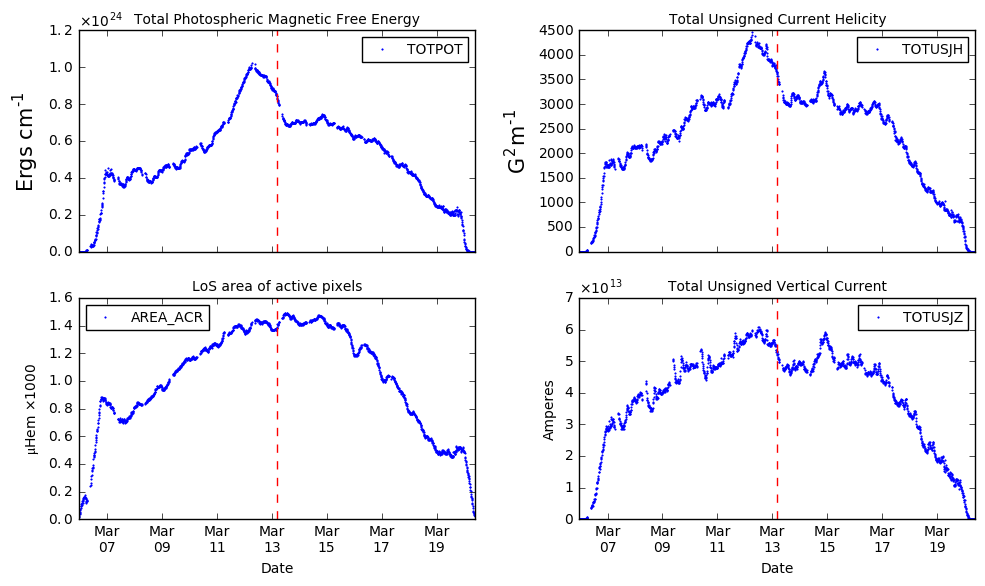

In [36]:
fig, ax = plt.subplots(2,2,sharex=True,figsize=(10,6))

axi = ax[0, 0]
axi.plot(k.index, k.TOTPOT, '.', ms=2, label='TOTPOT')
axi.set_title('Total Photospheric Magnetic Free Energy')
axi.set_ylabel(r'Ergs $cm^{-1}$',size=15)

axi = ax[0, 1]
axi.plot(k.index, k.TOTUSJH, '.', ms=2, label='TOTUSJH')
axi.set_title('Total Unsigned Current Helicity')
axi.set_ylabel('$G^{2} m^{-1}$',size=15)

axi = ax[1,0]
axi.plot(k.index, k.AREA_ACR/1e3,'.', ms=2,label='AREA_ACR')
axi.set_title('LoS area of active pixels')
axi.set_ylabel(r'$\mu$Hem $\times 1000$')
axi.set_xlabel('Date')

axi = ax[1, 1]
axi.errorbar(k.index, k.TOTUSJZ, fmt='.', ms=2,
             capsize=0, label='TOTUSJZ')
axi.set_title('Total Unsigned Vertical Current')
axi.set_ylabel(r'Amperes')
axi.set_xlabel('Date')

axi.xaxis.set_major_locator(dates.AutoDateLocator())
axi.xaxis.set_major_formatter(dates.DateFormatter('%b\n%d'))

for axi in ax.flatten():
    axi.axvline(t_cm, ls='--', color='r')
    axi.legend(loc='best', numpoints=1)
    
fig.tight_layout(pad=1.2, w_pad=2)
plt.draw()

#fig.savefig('all days_NOAA 12297.pdf')
fig.savefig('all days_NOAA 12297.png', dpi=200)

plt.show()


##### Sumber: https://nbviewer.jupyter.org/github/kbg/ipynbs/blob/master/hminuggets/sharp_metadata.ipynb